# Wiki NBA Stat Scraper

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [3]:
url = 'https://en.wikipedia.org/wiki/Michael_Jordan'

In [ ]:
# Check to see if this works on other players
# url = 'https://en.wikipedia.org/wiki/Kobe_Bryant'

In [15]:
# Some of the wiki pages for players have a different format to 
# scrape from. Use this line for pages like this:
url = 'https://en.wikipedia.org/wiki/Shawn_Kemp'

# wikitable = soup.find('table', {'class':'wikitable'})

In [16]:
r = requests.get(url)
text = r.text
soup = BeautifulSoup(text, 'html.parser')
# Check to make sure you have a connection to the website
r.status_code

200

In [ ]:
# Use prettify to get a good
# look at the HTML
# print(soup.prettify())

In [17]:
# I found two different formats for the stat data
# This Try/Except statement find which format to use
try:
    # Format 1
    # I'm using this method to create wikitable 
    wikitable = soup.find('table', {'class':'wikitable sortable'})
    # Find all 'th' and 'td'
    th = wikitable.find_all(['th'])
    td = wikitable.find_all(['td'])
    x = True
    y = False
    regular_season = []
except:
    # Format 2
    wikitable = soup.find('table', {'class':'wikitable'})
    # Find all 'th' and 'td'
    th = wikitable.find_all(['th'])
    td = wikitable.find_all(['td'])
    y = True
    x = False
    regular_season = []

In [18]:
stat_header = []
for col in th:
    col = col.get_text()
    col = col.rstrip()
    stat_header.append(col)

In [19]:
stat = []
for row in td:
    row = row.get_text()
    row = row.rstrip()
    stat.append(row)

In [20]:
# Drop the last two rows starting @ Career
# These rows have a different shape 
# and will be a problem in merging the data
while x == True:
    for s in stat:
        if s != 'Career':
            regular_season.append(s)
            continue
        else:
            x = False
            break
while y == True:
    for s in stat:
        if s != 'Career totals':
            regular_season.append(s)
            continue
        else:
            y = False
            break

In [21]:
# This line creates a list that matches 
# the length of the regular season stats
header = stat_header * (len(regular_season)//len(stat_header))

In [22]:
# Creates a list of tuples
# Unpacked the to list into tuple to save data
# Important to keep the header column and stat (key/value) pair connected
result = list(zip(header, regular_season))

In [23]:
sYear = []
sSeason = []
sTeam = []
sGP = []
sGS = []
sMPG = []
sFG = []
s3P = []
sFT = []
sRPG = []
sAPG = []
sSPG = []
sBPG = []
sPPG = []

# Loop through the results list of tuples 
# and add the stats to the correct list
# Clean data for processing
for x in result:
    if x[0] == 'Year':
        stp = (x[1].rstrip('†'))
        sYear.append(stp)
    elif x[0] == 'Season':
        if len(x[1]) > 7:
            stp = x[1][:-2]
            sSeason.append(stp)
        else:
            sSeason.append(x[1])
    elif x[0] == 'Team':
        sTeam.append(x[1])
    elif x[0] == 'GP':
        sGP.append(x[1])
    elif x[0] == 'GS':
        sGS.append(x[1])
    elif x[0] == 'MPG':
        stp = (x[1].rstrip('*'))
        sMPG.append(stp)
    elif x[0] == 'FG%':
        sFG.append(x[1])
    elif x[0] == '3P%':
        s3P.append(x[1])
    elif x[0] == 'FT%':
        sFT.append(x[1])
    elif x[0] == 'RPG':
        sRPG.append(x[1])
    elif x[0] == 'APG':
        sAPG.append(x[1])
    elif x[0] == 'SPG':
        stp = (x[1].rstrip('*'))
        sSPG.append(stp)
    elif x[0] == 'BPG':
        sBPG.append(x[1])
    elif x[0] == 'PPG':
        stp = (x[1].rstrip('*'))
        sPPG.append(stp)

In [24]:
# Format 1
# Now that the stats are in the correct 
# list create the dataframe
if len(stat_header) == 13:
    df = pd.DataFrame(list(zip(sYear,sTeam,sGP,sGS,sMPG,sFG,s3P,sFT,sRPG,sAPG,sSPG,sBPG,sPPG)), 
                   columns =['Year', 'Team', 'GP','GS','MPG','FG%','3P%','FT%','RPG','APG','SPG','BPG','PPG']) 
else:
    df1 = pd.DataFrame(list(zip(sSeason,sTeam,sGP,sGS,sMPG,sFG,sFT,sBPG,sRPG,sAPG,sPPG)), 
                   columns =['Season', 'Team', 'GP','GS','MPG','FG%','FT%','BPG','RPG','APG','PPG']) 

In [13]:
# All the successfully scraped from the website and now sits in this dataframe
df

,Year,Team,GP,GS,MPG,FG%,3P%,FT%,RPG,APG,SPG,BPG,PPG
0,1984–85,Chicago,82,82,38.3,.515,.173,.845,6.5,5.9,2.4,.8,28.2
1,1985–86,Chicago,18,7,25.1,.457,.167,.840,3.6,2.9,2.1,1.2,22.7
2,1986–87,Chicago,82,82,40.0,.482,.182,.857,5.2,4.6,2.9,1.5,37.1
3,1987–88,Chicago,82,82,40.4,.535,.132,.841,5.5,5.9,3.2,1.6,35.0
4,1988–89,Chicago,81,81,40.2,.538,.276,.850,8.0,8.0,2.9,.8,32.5
5,1989–90,Chicago,82,82,39.0,.526,.376,.848,6.9,6.3,2.8,.7,33.6
6,1990–91,Chicago,82,82,37.0,.539,.312,.851,6.0,5.5,2.7,1.0,31.5
7,1991–92,Chicago,80,80,38.8,.519,.270,.832,6.4,6.1,2.3,.9,30.1
8,1992–93,Chicago,78,78,39.3,.495,.352,.837,6.7,5.5,2.8,.8,32.6
9,1994–95,Chicago,17,17,39.3,.411,.500,.801,6.9,5.3,1.8,.8,26.9


In [25]:
df1

,Season,Team,GP,GS,MPG,FG%,FT%,BPG,RPG,APG,PPG
0,1989–90,Seattle,81,1,13.8,.479,.736,0.9,4.3,0.3,6.5
1,1990–91,Seattle,81,66,30.1,.508,.661,1.5,8.4,1.8,15.0
2,1991–92,Seattle,64,23,28.3,.504,.748,1.9,10.4,1.3,15.5
3,1992–93,Seattle,78,68,33.1,.492,.712,1.9,10.7,2.0,17.8
4,1993–94,Seattle,79,73,32.9,.538,.741,2.1,10.8,2.6,18.1
5,1994–95,Seattle,82,79,32.7,.547,.749,1.5,10.9,1.8,18.7
6,1995–96,Seattle,79,76,33.3,.561,.742,1.6,11.4,2.2,19.6
7,1996–97,Seattle,81,75,34.0,.510,.742,1.0,10.0,1.9,18.7
8,1997–98,Cleveland,80,80,34.6,.445,.727,1.1,9.3,2.5,20.1
9,1998–99,Cleveland,42,42,35.1,.482,.789,1.1,9.2,2.4,20.5


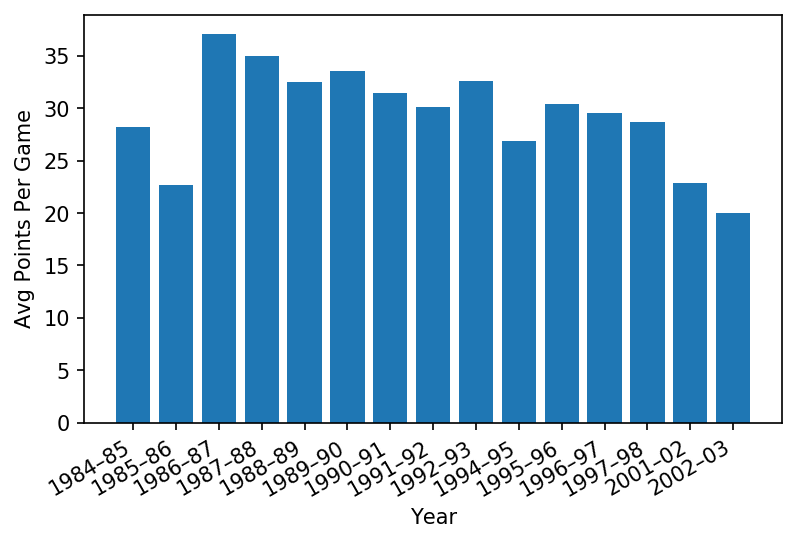

In [14]:
PPG = [float(line) for line in df.PPG]
plt.bar(df.Year, PPG)
plt.xlabel(r'Year')
plt.ylabel(r'Avg Points Per Game')
plt.gcf().autofmt_xdate()

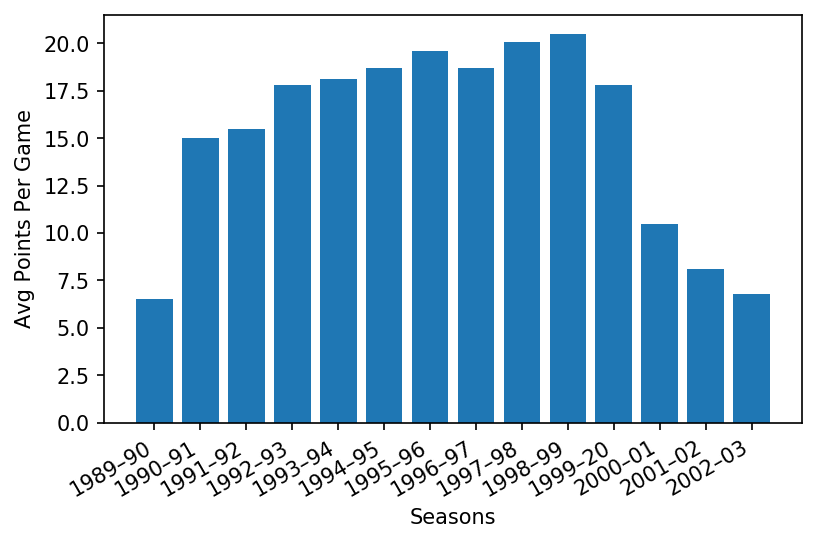

In [26]:
PPG = [float(line) for line in df1.PPG]
plt.bar(df1.Season, PPG)
plt.xlabel(r'Seasons')
plt.ylabel(r'Avg Points Per Game')
plt.gcf().autofmt_xdate()

In [ ]:
# Repeat the same for the playoff numbers

In [ ]:
# Upload in SQLite
# If play is in db do nothing
# Else upload data

In [ ]:
# Create visualizations in matplotlib